#### Notebook Description

__03 contains the final model development and commentary on the conclusion.__



## Index links
- [Preparation](#Preparation)
- [Hyperparameter Optimization](#Hyperparameter-Optimization)
- [Final Model Determination](#Final-Model-Determination)
- [Conclusion](#Conclusion)

In [2]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import print_function

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import final CSV's
train = pd.read_csv('../datasets/train_final.csv', index_col=0)
test = pd.read_csv('../datasets/test_final.csv', index_col=0)

In [4]:
train.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,2nd Flr SF,Low Qual Fin SF,...,Heating QC,Central Air,Kitchen Qual,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,SalePrice
0,-1.721152,0.427620,0.153560,0.994089,1.052065,0.198726,-0.293918,-0.835268,0.977170,-0.101005,...,0.887886,0.26775,0.737105,-0.938966,0.275654,0.283689,0.271216,0.314379,-0.039418,130500.0
1,-0.437329,0.170597,0.814931,0.610520,0.173026,0.427042,-0.293918,-0.644127,2.039453,-0.101005,...,0.887886,0.26775,0.737105,0.556642,0.275654,0.283689,0.271216,0.314379,-0.039418,220000.0
2,0.309079,-0.282525,-0.607017,1.089982,-0.566039,0.633405,-0.293918,-0.530353,-0.783185,-0.101005,...,-1.200000,0.26775,0.737105,-0.938966,-0.944386,0.283689,0.271216,0.314379,-0.039418,109000.0
3,0.458361,-0.043906,1.145617,1.089982,-0.566039,-0.971394,-0.293918,-0.398374,0.851097,-0.101005,...,-0.156057,0.26775,-0.771078,-0.938966,1.495694,0.283689,0.271216,0.314379,-0.039418,174000.0
4,0.727068,0.518752,-2.359651,0.418735,-0.566039,-0.971394,-0.293918,0.266069,0.650314,-0.101005,...,-1.200000,0.26775,-0.771078,-0.938966,-0.944386,0.283689,0.271216,-3.414896,-0.039418,138500.0


In [5]:
test.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,2nd Flr SF,Low Qual Fin SF,...,Heating QC,Central Air,Kitchen Qual,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Id
0,0.338936,-0.127677,-2.028965,-1.642950,-0.566039,-0.971394,-0.293918,1.048838,1.598197,-0.101005,...,-0.156057,-3.734833,-2.279262,-0.938966,-0.944386,-3.655683,-3.712056,0.314379,-0.039418,2658
1,-1.721152,-0.061676,0.186629,-0.348403,-0.566039,-0.971394,-0.293918,3.203728,-0.783185,-0.101005,...,-1.200000,0.267750,-0.771078,-0.938966,1.495694,0.283689,0.271216,0.314379,-0.039418,2718
2,0.010516,0.882900,1.145617,1.042035,-0.566039,0.244828,-0.293918,-1.044614,1.159276,-0.101005,...,0.887886,0.267750,0.737105,1.304445,0.275654,0.283689,0.271216,0.314379,-0.039418,2414
3,0.070229,-0.206624,-1.599074,1.042035,-0.566039,-0.971394,-0.293918,0.930513,-0.783185,-0.101005,...,-1.200000,0.267750,-0.771078,-0.938966,-0.944386,-1.685997,0.271216,-3.414896,-0.039418,1989
4,-1.721152,-0.082237,-0.276331,-1.019650,0.816908,0.365573,-0.293918,0.514098,-0.783185,-0.101005,...,-0.156057,0.267750,-0.771078,1.304445,0.275654,0.283689,0.271216,0.314379,-0.039418,625


## Preparation

We'll proceed with testing to see how the models perform after the final preprocessing.

In [6]:
features = [col for col in train.columns if col != 'SalePrice']
X = train[features]
y = train['SalePrice']

test['SalePrice'] = 0
X_kag = test[features]
y_kag = test['SalePrice']

In [7]:
def scoring(X, y):
    # linear regression score
    lr = LinearRegression()
    lr = lr.fit(X, y)
    print('OLS CV score: ' + str(cross_val_score(lr, X, y, cv=3).mean()))
    
    # ridge score
    ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
    ridge = ridge.fit(X, y)
    print('Ridge CV score: ' + str(cross_val_score(ridge, X, y, cv=3).mean()))
    
    # lasso score
    lasso = LassoCV(n_alphas=200)
    lasso = lasso.fit(X, y)
    print('Lasso CV score: ' + str(cross_val_score(lasso, X, y, cv=3).mean()))
    
    # elastic score
    elastic = ElasticNetCV()
    elastic = elastic.fit(X, y)
    print('Elastic CV score: ' + str(cross_val_score(elastic, X, y, cv=3).mean()))
    return lr, ridge, lasso, elastic

In [8]:
# test the function
lr, ridge, lasso, elastic = scoring(X, y)

OLS CV score: -1.9824986520083016e+18
Ridge CV score: 0.8727067844426326
Lasso CV score: 0.8213346642278733
Elastic CV score: 0.3460094318070464


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

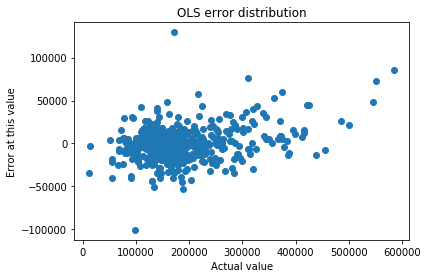

In [10]:
y_pred = lr.predict(X_test)
errors = y_test - y_pred
plt.title('OLS error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

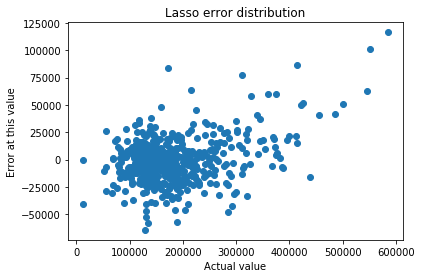

In [11]:
y_pred = lasso.predict(X_test)
errors = y_test - y_pred
plt.title('Lasso error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

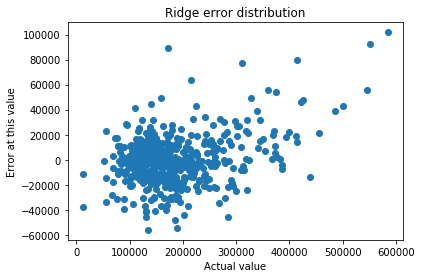

In [12]:
y_pred = ridge.predict(X_test)
errors = y_test - y_pred
plt.title('Ridge error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

### Review of Initial Results

OLS regression is having major problems with some aspect of the new features.  Elastic isn't performing well either.  We will be proceeding with Lasso and Ridge instead.  We added a significant number of features to the column, ordinary least squares regression was not expected to perform well with so many features.

In [13]:
# predicting the target values in the kaggle competition
kag_pred = lasso.predict(X_kag)
sub5_lasso_impr = test.copy()
sub5_lasso_impr['SalePrice'] = kag_pred
sub5_lasso_impr = sub5_lasso_impr[['Id', 'SalePrice']]
sub5_lasso_impr['SalePrice'].head()
sub5_lasso_impr.to_csv('../subs/sub5_lasso_impr.csv', index=False)

In [14]:
# predicting the target values in the kaggle competition
kag_pred = ridge.predict(X_kag)
sub6_ridge_impr = test.copy()
sub6_ridge_impr['SalePrice'] = kag_pred
sub6_ridge_impr = sub6_ridge_impr[['Id', 'SalePrice']]
sub6_ridge_impr['SalePrice'].head()
sub6_ridge_impr.to_csv('../subs/sub6_ridge_impr.csv', index=False)

## Hyperparameter Optimization

We will create a function to test hyperparameters using grid search, and see how scores might be improved. 

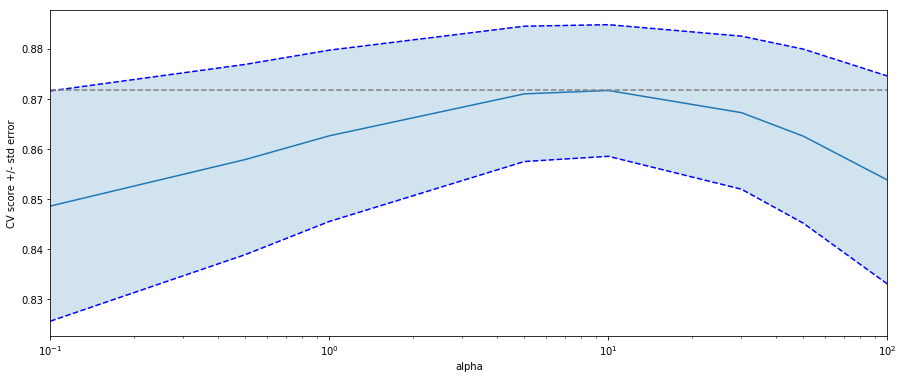

In [15]:
ridge = Ridge(random_state=0)
alphas = (0.1, 0.5, 1, 5, 10, 30, 50, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(15, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

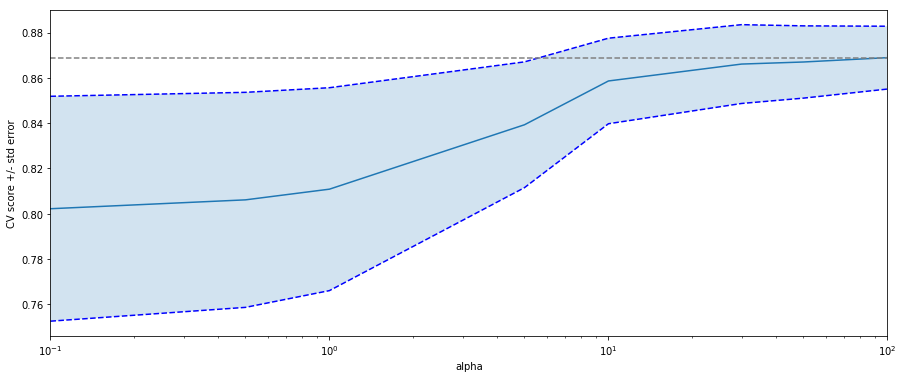

In [16]:
lasso = Lasso(random_state=0)
alphas = (0.1, 0.5, 1, 5, 10, 30, 50, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(15, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

#### Review

Reviewing the grid search, Lasso works best with an alpha of 10 and Ridge works best with an alpha of 50.  These are both approximations, but we do see either a drop-off in performance or a plateau for each.

### Final Model Determination

We will compare LassoCV and RidgeCV performance, plot errors, and choose which of the two performs the best to be our final production model.

In [17]:
lasso = LassoCV(alphas=[2,4,8,10,12,14,16], cv=5).fit(X, y)
ridge = RidgeCV(alphas=[30,35,40,45,50,55], cv=5).fit(X, y)

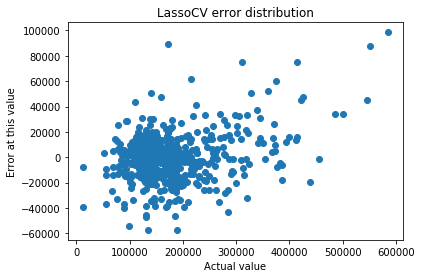

In [18]:
y_pred = lasso.predict(X_test)
errors = y_test - y_pred
plt.title('LassoCV error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

In [19]:
lasso.score(X_train, y_train)

0.9258427607264067

In [20]:
lasso.score(X_test, y_test)

0.9422364411570168

In [21]:
cross_val_score(lasso, X, y, cv=5).mean()

0.8628983746467658

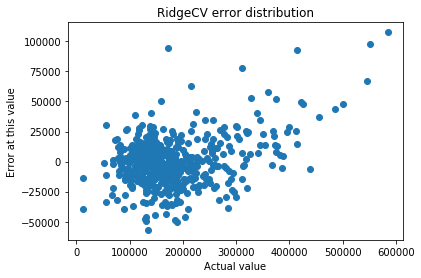

In [22]:
y_pred = ridge.predict(X_test)
errors = y_test - y_pred
plt.title('RidgeCV error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

In [23]:
ridge.score(X_train, y_train)

0.910739092910603

In [24]:
ridge.score(X_test, y_test)

0.9362450831112175

In [25]:
cross_val_score(ridge, X, y, cv=5).mean()

0.862544403884988

In [27]:
coef_df = pd.DataFrame(ridge.coef_, columns=['coefs'])
coef_df['abs_coefs'] = abs(ridge.coef_)
coef_df.index = train.columns[1:]
coef_df = coef_df.sort_values('abs_coefs', ascending=False)
coef_df.head(10)

,coefs,abs_coefs
Neighborhood_Timber,19198.649533,19198.649533
Garage Cars TotRms AbvGrd,18802.725274,18802.725274
Garage Cars 1st Flr SF,18706.036199,18706.036199
Garage Cars TotRms AbvGrd.1,-17700.182493,17700.182493
Total Bsmt SF Bedroom AbvGr,-16085.974266,16085.974266
Neighborhood_OldTown,15351.077658,15351.077658
Garage Cars Bedroom AbvGr,13541.012049,13541.012049
Overall Cond,12926.491454,12926.491454
Gr Liv Area TotRms AbvGrd.1,12681.922084,12681.922084
Gr Liv Area 1st Flr SF,-11976.595896,11976.595896


In [28]:
coef_df = pd.DataFrame(lasso.coef_, columns=['coefs'])
coef_df['abs_coefs'] = abs(ridge.coef_)
coef_df.index = train.columns[1:]
coef_df = coef_df.sort_values('abs_coefs', ascending=False)
coef_df.head(10)

,coefs,abs_coefs
Neighborhood_Timber,43433.327990,19198.649533
Garage Cars TotRms AbvGrd,41521.251380,18802.725274
Garage Cars 1st Flr SF,26866.619040,18706.036199
Garage Cars TotRms AbvGrd.1,-29687.764936,17700.182493
Total Bsmt SF Bedroom AbvGr,-14558.216434,16085.974266
Neighborhood_OldTown,26314.529829,15351.077658
Garage Cars Bedroom AbvGr,14812.018715,13541.012049
Overall Cond,11172.583745,12926.491454
Gr Liv Area TotRms AbvGrd.1,26606.218763,12681.922084
Gr Liv Area 1st Flr SF,-5059.835377,11976.595896


In [74]:
# predicting the target values in the kaggle competition
kag_pred = ridge.predict(X_kag)
sub7_ridge_final = test.copy()
sub7_ridge_final['SalePrice'] = kag_pred
sub7_ridge_final = sub7_ridge_final[['Id', 'SalePrice']]
sub7_ridge_final['SalePrice'].head()
sub7_ridge_final.to_csv('../subs/sub7_ridge_final.csv', index=False)

In [75]:
# predicting the target values in the kaggle competition
kag_pred = ridge.predict(X_kag)
sub8_lasso_final = test.copy()
sub8_lasso_final['SalePrice'] = kag_pred
sub8_lasso_final = sub8_lasso_final[['Id', 'SalePrice']]
sub8_lasso_final['SalePrice'].head()
sub8_lasso_final.to_csv('../subs/sub8_lasso_final.csv', index=False)

### Results review and final model commentary

The models performed reasonably well, just over 23,000 for Ridge.  Ridge performed better than Lasso on the Kaggle competition, despite the scores being very close with our local cross-validation and train/test comparison.  The final model we'll proceed with for production will be RidgeCV.  The model should be able to generalize new data, as it uses almost all original data columns aside from one.  The data EDA would flow well with new housing data, new data can be fed into it and cleaning will be performed through the existing.  __Note the exception to this of the one invalid data point that was manually re-assigned__.  New data entered into the model would still greatly benefit from close review, as new problems may exist that weren't covered in the data used here.

Further tuning of the model could be undertaken, however we already have a high degree of accuracy, the marginal benefit of any increased time invested into optimizing the model at this time would have drastically falling benefits.

## Conclusion

Across this project, we completed the following tasks:

##### Initial Data Cleaning
1. Missing values and invalid data were cleaned
2. Skewed data were log transformed to move them towards normal distributions
3. Polynomial features were created between closely correlated values

##### Basic model development
1. Basic linear regression reviewed
2. Basic ridge and lasso regressions reviewed
3. Feature scaling
4. Categorical data replacement

##### Final model development
1. Models were re-evaluated with the newest data
2. Hyperparameter optimization was tested with grid search
3. Final model candidates were tested, and RidgeCV were the highest overall performer


##### Further model development<br>
Our current Ridge model scores are quite adequate.  Further improvements could be considered to improve the model, however the marginal benefit of further exploration or model adjustments is likely to be very low.  Further improvement should be undertaken only if for the business case the current model accuracy is not high enough.

Potential improvement areas:
1. Feature removal
2. Polynomial feature selection adjustment
3. Modification of our previous decisions on how to handle missing data